In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
from tensorflow.keras.datasets import mnist
from collections import Counter

(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
print("訓練集的類別數量：%s" %Counter(y_train_label))
print("訓練集的維度：", x_train_image.shape)
print("測試集的類別數量：%s" %Counter(y_test_label))
print("測試集的維度：", x_test_image.shape)


訓練集的類別數量：Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
訓練集的維度： (60000, 28, 28)
測試集的類別數量：Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
測試集的維度： (10000, 28, 28)


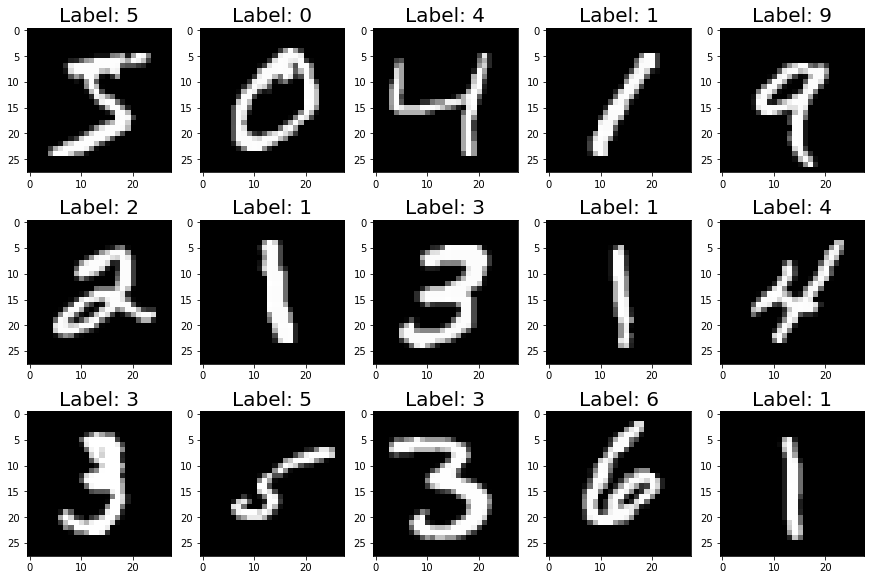

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i in range(15):
    ax = plt.subplot(3, 5, 1+i)
    ax.imshow(x_train_image[i], cmap="gray")
    ax.set_title("Label: %s" %(y_train_label[i]), size=20)
    #plt.imsave(str(y_train_label[i])+".png", x_train_image[i], cmap = plt.cm.gray)
plt.show()


In [4]:
from tensorflow.keras.utils import to_categorical
import numpy as np
y_train = to_categorical(y_train_label)
y_test = to_categorical(y_test_label)
print(y_train_label[0])
print(y_train[0])

x_train = x_train_image.astype('float32')/255
x_train = np.expand_dims(x_train, -1)
x_test = x_test_image.astype('float32')/255
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 28, 28, 1)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
cnn = Sequential()
cnn.add(Conv2D(16, (4,4), activation='relu', padding='same', input_shape=(28,28,1)))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, (2,2), activation='relu', padding='same'))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.summary()
print("\n模型參數量:", cnn.count_params())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        272       
                                                                 
 dropout (Dropout)           (None, 28, 28, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        2080      
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 32)                802848    
                                                                 
 dense_1 (Dense)             (None, 10)                3

In [6]:
from tensorflow.keras.optimizers import Adam
Adam(learning_rate=0.0001)

# 編譯方式
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
# 可視化訓練過程
tensorboard = TensorBoard(log_dir="my_log")

# 模型檢查點
model_checkpoint = ModelCheckpoint(filepath="weight.{epoch:02d}-{val_acc:.4f}.h5", 
                                monitor="val_acc", save_best_only=True, verbose=0)


In [ ]:
history = cnn.fit(x=x_train, y=y_train, batch_size=8, epochs=10, verbose=1, shuffle=True, 
                               validation_data=(x_test, y_test), callbacks=[tensorboard, model_checkpoint])

Epoch 1/10
